In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
# load 100 imgs from celebfaces ds
from libs import utils
files = utils.get_celeb_files()

In [5]:
# get 50th img
img = plt.imread(files[50])
print(img)

[[[206 203 210]
  [205 202 209]
  [204 201 208]
  ..., 
  [218 216 227]
  [219 216 227]
  [219 216 227]]

 [[206 203 210]
  [205 202 209]
  [204 201 208]
  ..., 
  [218 216 227]
  [219 216 227]
  [219 216 227]]

 [[206 203 210]
  [205 202 209]
  [204 201 208]
  ..., 
  [218 216 227]
  [219 216 227]
  [219 216 227]]

 ..., 
 [[234 238 241]
  [234 238 241]
  [234 238 241]
  ..., 
  [148 111  93]
  [156 123 108]
  [158 125 110]]

 [[235 239 242]
  [235 239 242]
  [235 239 242]
  ..., 
  [144 107  89]
  [162 128 116]
  [154 120 108]]

 [[235 239 242]
  [235 239 242]
  [235 239 242]
  ..., 
  [144 107  89]
  [132  98  88]
  [124  90  80]]]


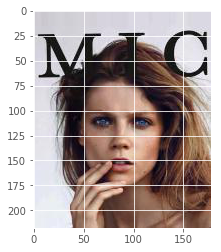

In [6]:
# draw img
plt.imshow(img)

In [7]:
# 218 rows, 178 cols, 3 color channels (rgb)
img.shape

(218, 178, 3)

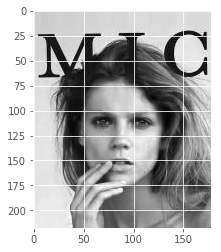

In [8]:
plt.imshow(img[:,:,0], cmap='gray') # only red

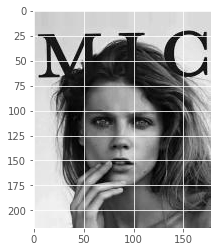

In [9]:
plt.imshow(img[:,:,1], cmap='gray') # only green

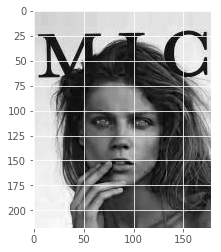

In [10]:
plt.imshow(img[:,:,2], cmap='gray') # only blue

In [11]:
# load first 100 imgs
imgs = utils.get_celeb_imgs()

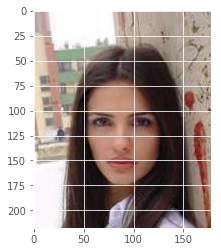

In [12]:
# display img
plt.imshow(imgs[0])

In [13]:
imgs[0].shape

(218, 178, 3)

In [14]:
# batch dimension - (imgs, height, width, nbr channels)
# combine all imgs to have 4 dimensions in an array 
# all imgs must be same size to use...
data = np.array(imgs)
data.shape

(100, 218, 178, 3)

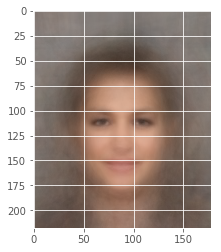

In [15]:
# mean of batch channel - 
# reduce data down to single representation of what the dataset looks like
mean_img = np.mean(data, axis=0)
plt.imshow(mean_img.astype(np.uint8))

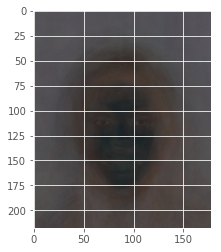

In [16]:
# show where changes are likely to be in data
# where and how much variance from mean
std_img = np.std(data, axis=0)
plt.imshow(std_img.astype(np.uint8))

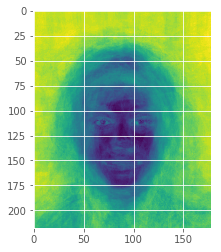

In [17]:
# avg variance over all channels (mean)
# on average, how color will vary
# more red - mean image not best representation - more blue - mean image closer...
plt.imshow(np.mean(std_img, axis=2).astype(np.uint8))

In [19]:
# preprocessing (remove mean and sd)
# normalize => subtract mean and divide by sd 

# convert data into 1D array
flattened = data.ravel()
print(data[:1])
print(flattened[:10])

[[[[186 168 166]
   [181 166 163]
   [180 166 163]
   ..., 
   [173 156 149]
   [188 173 170]
   [139 124 121]]

  [[186 168 166]
   [181 166 163]
   [180 166 163]
   ..., 
   [167 150 143]
   [187 172 169]
   [144 129 126]]

  [[186 168 166]
   [181 166 163]
   [179 165 162]
   ..., 
   [154 137 130]
   [181 166 163]
   [149 134 131]]

  ..., 
  [[253 248 254]
   [253 248 254]
   [253 248 254]
   ..., 
   [108  59  42]
   [ 91  64  35]
   [ 91  64  35]]

  [[253 248 254]
   [253 248 254]
   [253 248 254]
   ..., 
   [100  53  35]
   [ 82  55  26]
   [ 87  60  31]]

  [[253 248 254]
   [253 248 254]
   [253 248 254]
   ..., 
   [ 99  54  35]
   [ 82  55  26]
   [ 87  60  31]]]]
[186 168 166 181 166 163 180 166 163 183]


(array([ 216804.,  117821.,   99125.,   71049.,   66478.,   62066.,
          62528.,   58085.,   56686.,   56114.,   56848.,   58551.,
          63168.,   61086.,   59193.,   59305.,   62526.,   63596.,
          62285.,   65061.,   63389.,   61989.,   61411.,   60742.,
          60464.,   60307.,   59074.,   59312.,   60353.,   64807.,
          67305.,   61667.,   59906.,   60546.,   62017.,   62268.,
          63030.,   62799.,   62396.,   62609.,   59541.,   58918.,
          57822.,   61451.,   63481.,   57782.,   57212.,   56516.,
          56039.,   58385.,   56252.,   55089.,   54677.,   52066.,
          51012.,   48826.,   47602.,   46064.,   45351.,   43735.,
          42849.,   42903.,   42571.,   41789.,   42412.,   42705.,
          42982.,   43107.,   43372.,   43416.,   43323.,   42808.,
          42253.,   42302.,   42008.,   41846.,   42800.,   42476.,
          42435.,   42405.,   42584.,   42612.,   42671.,   42344.,
          42610.,   42023.,   42214.,   41700., 

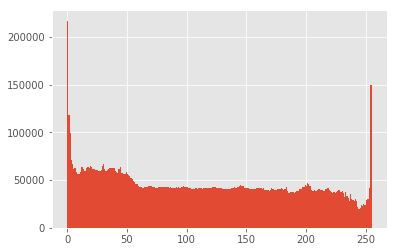

In [20]:
# visualize distribution (range) and frequency
# histogram of ever value in vector, use 255 bins 
# bin groups range of data and bars describe frequency of range.
plt.hist(flattened.ravel(), 255)

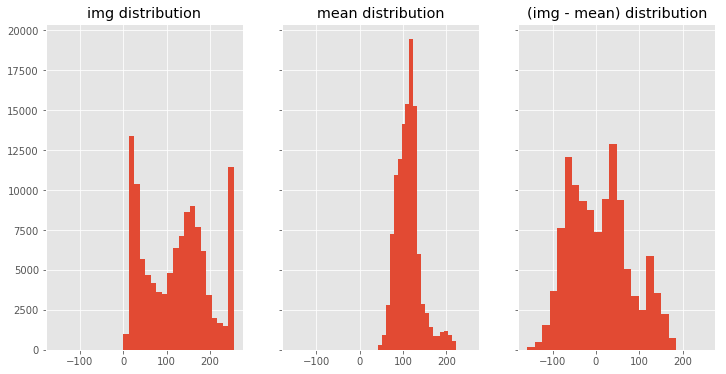

In [21]:
# subtract mean img (data) from image - 
# left with part of img that is unique to image
# orig img centered around value 100... now centered around 0
# seeing distribution of vals that were above and below mean image intensity
bins = 20
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0]).ravel(), bins)
axs[0].set_title('img distribution')
axs[1].hist((mean_img).ravel(), bins)
axs[1].set_title('mean distribution')
axs[2].hist((data[0] - mean_img).ravel(), bins)
axs[2].set_title('(img - mean) distribution')

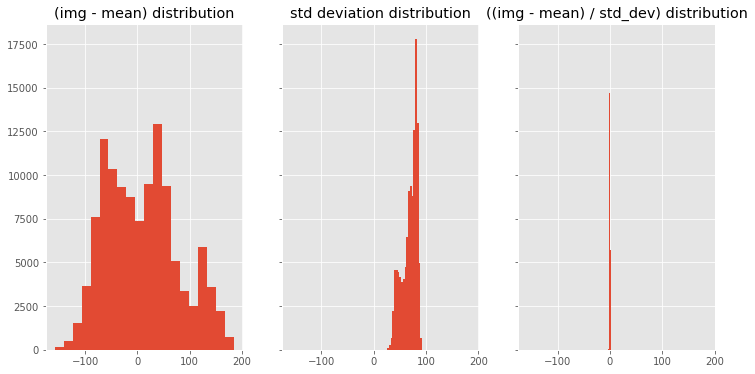

In [22]:
# divide by sd
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0] - mean_img).ravel(), bins)
axs[0].set_title('(img - mean) distribution')
axs[1].hist((std_img).ravel(), bins)
axs[1].set_title('std deviation distribution')
axs[2].hist(((data[0] - mean_img) / std_img).ravel(), bins)
axs[2].set_title('((img - mean) / std_dev) distribution')

In [23]:
# scale range -3 to 3
axs[2].set_xlim([-150, 150])
axs[2].set_xlim([-100, 100])
axs[2].set_xlim([-50, 50])
axs[2].set_xlim([-10, 10])
axs[2].set_xlim([-5, 5])

(-5, 5)